In [4]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

# read data 
data = pd.read_csv('../weather.csv'  )

In [5]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [6]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,77285.000000,77285.000000,77285.000000,77285.000000,77285.000000,77285.000000,77285.000000
mean,11.932073,10.851287,0.734422,10.802289,187.739678,10.350661,1003.218889
std,9.568044,10.720713,0.195435,6.896763,107.337926,4.189296,117.080764
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.561111,2.272222,0.600000,5.828200,117.000000,8.339800,1011.910000
50%,11.994444,11.994444,0.780000,9.965900,180.000000,10.046400,1016.470000
75%,18.850000,18.850000,0.890000,14.135800,290.000000,14.812000,1021.080000
max,39.905556,38.416667,1.000000,63.852600,359.000000,16.100000,1046.380000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77285 entries, 0 to 77284
Data columns (total 11 columns):
Formatted Date              77285 non-null object
Summary                     77285 non-null object
Precip Type                 76881 non-null object
Temperature (C)             77285 non-null float64
Apparent Temperature (C)    77285 non-null float64
Humidity                    77285 non-null float64
Wind Speed (km/h)           77285 non-null float64
Wind Bearing (degrees)      77285 non-null int64
Visibility (km)             77285 non-null float64
Pressure (millibars)        77285 non-null float64
Daily Summary               77285 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 6.5+ MB


In [13]:
data.columns = ['Formatted_Date', 'Summary', 'Precip_Type', 'Temperature',
       'Apparent_Temperature', 'Humidity', 'Win_Speed',
       'Wind_Bearing', 'Visibility', 'Pressure',
       'Daily_Summary']

In [ ]:
# split data in train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X , y ,test_size=0.30, random_state=42 )

# Understanding data distribution 

Index([u'Precip_Type'], dtype='object')
(77268, 11)


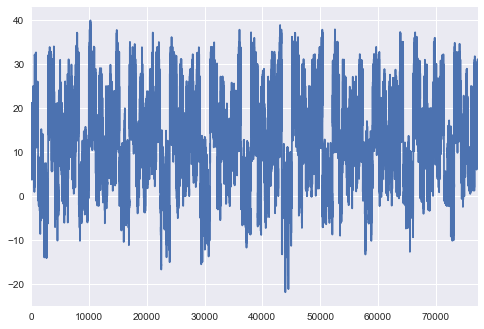

In [14]:

# check for missing values
null_value_columns = data.columns[data.isnull().any()]
print(null_value_columns)
    # there are missing values in this data 

# check for duplicates rows and columns 
print(data.drop_duplicates(keep = 'first').shape )
    # there are duplicate values in the rows 
    
# check for target variable distribution 
data.Temperature.plot()
 

# Visualization 



In [15]:
# correlation of variables with target 
data.corr()['Temperature']

Temperature             1.000000
Apparent_Temperature    0.992650
Humidity               -0.631860
Win_Speed               0.006087
Wind_Bearing            0.028669
Visibility              0.393023
Pressure               -0.008325
Name: Temperature, dtype: float64

In [16]:
# is there a correlation among variables excluding target
correlations=data.corr()
attrs = correlations.iloc[:-1,:-1]
attrs

,Temperature,Apparent_Temperature,Humidity,Win_Speed,Wind_Bearing,Visibility
Temperature,1.000000,0.992650,-0.631860,0.006087,0.028669,0.393023
Apparent_Temperature,0.992650,1.000000,-0.602287,-0.059701,0.027553,0.381814
Humidity,-0.631860,-0.602287,1.000000,-0.222247,0.001742,-0.370555
Win_Speed,0.006087,-0.059701,-0.222247,1.000000,0.104298,0.100110
Wind_Bearing,0.028669,0.027553,0.001742,0.104298,1.000000,0.048980
Visibility,0.393023,0.381814,-0.370555,0.100110,0.048980,1.000000


In [17]:
# check for multicollinearity
threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

C:\Users\sudha\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


,Attribute Pair,Correlation
1,"(Apparent_Temperature, Temperature)",0.992650
0,"(Humidity, Temperature)",-0.631860
2,"(Apparent_Temperature, Humidity)",-0.602287


In [42]:
import numpy as np 

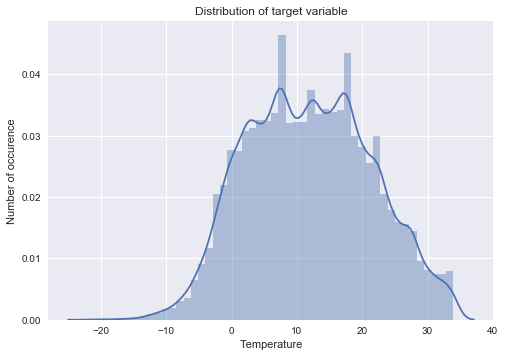

In [23]:
# check impact of x's on y 
sns.distplot(data.Temperature)
plt.title("Distribution of target variable")
plt.ylabel("Number of occurence")
plt.xlabel("Temperature")


C:\Users\sudha\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\sudha\Anaconda2\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


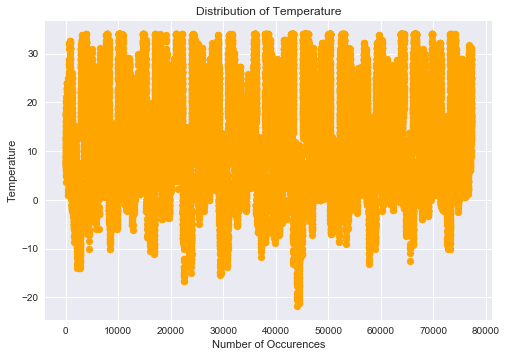

In [21]:
import numpy as np 
# check for the outliers 
upperlimit = np.percentile(data.Temperature.values, 99.5)
data['Temperature'].ix[data['Temperature']>upperlimit] = upperlimit

plt.scatter(range(data.shape[0]), data["Temperature"].values,color='orange')
plt.title("Distribution of Temperature")
plt.xlabel("Number of Occurences")
plt.ylabel("Temperature");


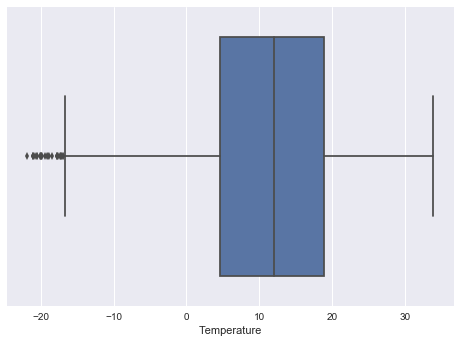

In [22]:
sns.boxplot("Temperature", data = data)

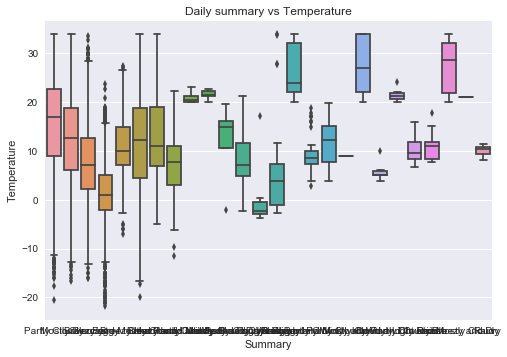

In [27]:
# check unique categoies 
sns.boxplot(data["Summary"],data["Temperature"])
plt.title("Daily summary vs Temperature");

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77285 entries, 0 to 77284
Data columns (total 11 columns):
Formatted_Date          77285 non-null object
Summary                 77285 non-null object
Precip_Type             76881 non-null object
Temperature             77285 non-null float64
Apparent_Temperature    77285 non-null float64
Humidity                77285 non-null float64
Win_Speed               77285 non-null float64
Wind_Bearing            77285 non-null int64
Visibility              77285 non-null float64
Pressure                77285 non-null float64
Daily_Summary           77285 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 6.5+ MB
